In [1]:
base_path = '/home/lynnyi/biorxiv-data-mining/'

In [15]:
import numpy as np

In [60]:
import json

path_to_data = base_path + '/complete_data_2018_5_11/data/data24.txt'
path_to_summary = base_path + '/complete_data_2018_5_11/analysis/journal_summary.txt'
path_to_save = base_path + '/complete_data_2018_5_11/analysis'


with open(path_to_data, 'rb') as f:
    papers = json.load(f)

with open(path_to_summary, 'rb') as f:
    journal_summary = json.load(f)

In [69]:
papers['papers'][1004]['twitter']

[[' ', 1],
 [' 19 Dec 2014 ', 6],
 [' 22 Dec 2014 ', 3],
 [' 24 Dec 2014 ', 1],
 [' 20 Dec 2014 ', 6],
 [' 13 Feb 2015 ', 9],
 [' 12 Feb 2015 ', 1],
 [' 16 Feb 2015 ', 5],
 [' 21 Dec 2014 ', 2]]

In [83]:
##REMEMBER TO FIX the 109 issues later with better looping

In [81]:
tweets = []
count_bad = 0
for paper in papers['papers']:
    paper_sum = 0
    for day in paper['twitter']:
        if(isinstance(day[1], str)):
            count_bad += 1
            break
        paper_sum += day[1]
    tweets = np.append(tweets, paper_sum)

In [82]:
count_bad

109

In [84]:
journals = [p['journal'] for p in papers['papers']]
journals

['PLOS Computational Biology',
 'Pre print',
 'PLOS Genetics',
 'PLOS ONE',
 'Genome Research',
 'Pre print',
 'Pre print',
 'Pre print',
 'Nucleic Acids Research',
 'PLOS Genetics',
 'BMC Genomics',
 'Nature',
 'European Journal of Cancer',
 'Pre print',
 'Pre print',
 'Biology Direct',
 'ACS Synthetic Biology',
 'Pre print',
 'Current Opinion in Genetics & Development',
 'Pre print',
 'Biochimie',
 'Trends in Genetics',
 'Pre print',
 'Pre print',
 'Pre print',
 'Pre print',
 'Pre print',
 'Pre print',
 'Pre print',
 'Pre print',
 'Pre print',
 'Pre print',
 'Pre print',
 'PLOS ONE',
 'BMC Bioinformatics',
 'Nature Reviews Genetics',
 'Pre print',
 'PLOS ONE',
 'Pre print',
 'Conservation Biology',
 'Pre print',
 'Pre print',
 'Pre print',
 'Molecular Psychiatry',
 'Pre print',
 'Pre print',
 'PLOS ONE',
 'PLOS ONE',
 'Pre print',
 'Pre print',
 'Bioinformatics',
 'PLOS ONE',
 'Genetics',
 'Molecular Biology and Evolution',
 'PLOS Biology',
 'PLOS ONE',
 'Neural Computation',
 'Pre p

In [85]:
titles = [p['title'] for p in papers['papers']]
titles

['Microenvironmental variables must influence intrinsic phenotypic parameters of cancer stem cells to affect tumourigenicity',
 'Designing Robustness to Temperature in a Feedforward Loop Circuit',
 'Speciation and introgression between Mimulus nasutus and Mimulus guttatus',
 'On the Reproducibility of TCGA Ovarian Cancer MicroRNA Profiles',
 'Population genomics of parallel hybrid zones in the mimetic butterflies, H. melpomene and H. erato',
 'A Complete Public Domain Family Genomics Dataset',
 'Water and the biology of *prions* and plaques',
 'Genome-wide targets of selection: female response to experimental removal of sexual selection in Drosophila melanogaster',
 'A genome wide dosage suppressor network reveals genetic robustness and a novel mechanism for Huntington’s disease',
 'Drosophila embryogenesis scales uniformly across temperature and developmentally diverse species',
 'Functional Annotation Signatures of Disease Susceptibility Loci Improve SNP Association Analysis',
 'Gene

In [86]:
len(tweets)

24598

In [87]:
import pandas as pd
df = pd.DataFrame(index = titles)

In [88]:
df['journals'] = journals
df['tweets'] = tweets

In [89]:
summary_stats = df.groupby('journals').agg(['mean', 'sum', 'size', 'var'])
summary_stats = summary_stats['tweets']
summary_stats

,mean,sum,size,var
journals,,,,
2017 IEEE International Conference on Bioinformatics and Biomedicine (BIBM),16.000000,16.0,1,NaN
2017 International Conference on Rehabilitation Robotics (ICORR),10.000000,10.0,1,NaN
3 Biotech,7.000000,7.0,1,NaN
ACS Applied Materials & Interfaces,6.000000,6.0,1,NaN
ACS Central Science,7.000000,7.0,1,NaN
ACS Chemical Biology,12.666667,38.0,3,100.333333
ACS Chemical Neuroscience,6.500000,26.0,4,17.666667
ACS Nano,25.000000,75.0,3,549.000000
ACS Synthetic Biology,16.200000,648.0,40,362.369231


In [129]:
summary_stats.sort_values('size', ascending=False)

,mean,sum,size,var
journals,,,,
Scientific Reports,17.780127,8410.0,473,337.845621
eLife,24.076355,9775.0,406,651.068230
PLOS ONE,14.527174,5346.0,368,224.435227
Bioinformatics,32.765734,9371.0,286,628.881769
Nature Communications,31.449782,7202.0,229,788.327511
PNAS,29.027273,6386.0,220,725.570029
PLOS Computational Biology,22.791469,4809.0,211,606.784879
Genetics,22.312849,3994.0,179,438.688092
PLOS Genetics,26.522727,4668.0,176,629.290909


/home/lynnyi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [109]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

/home/lynnyi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/lynnyi/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/lynnyi/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lynnyi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/lynnyi/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lynnyi/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
  

In [122]:
summary_stats = summary_stats.drop(index='Pre print')

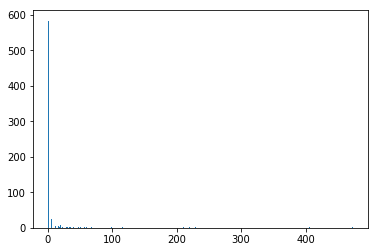

In [130]:
plt.hist(summary_stats['size'], bins=1000)
plt.show()

In [140]:
filtered = summary_stats[summary_stats['size'] > 10]

In [135]:
summary_stats[summary_stats['size']>10].sort_values('size', ascending=False)

,mean,sum,size,var
journals,,,,
Scientific Reports,17.780127,8410.0,473,337.845621
eLife,24.076355,9775.0,406,651.068230
PLOS ONE,14.527174,5346.0,368,224.435227
Bioinformatics,32.765734,9371.0,286,628.881769
Nature Communications,31.449782,7202.0,229,788.327511
PNAS,29.027273,6386.0,220,725.570029
PLOS Computational Biology,22.791469,4809.0,211,606.784879
Genetics,22.312849,3994.0,179,438.688092
PLOS Genetics,26.522727,4668.0,176,629.290909


In [138]:
from plotnine import *

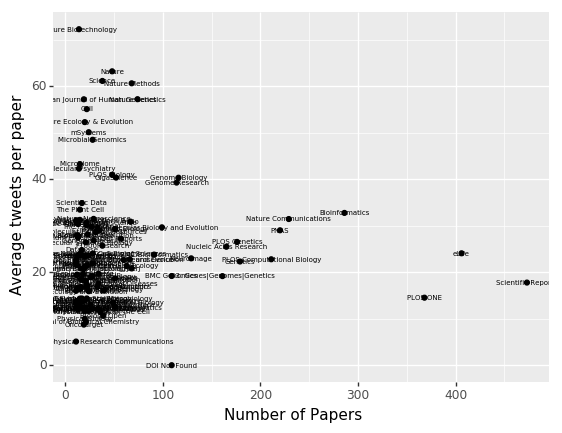

<ggplot: (-9223363288465681867)>

In [162]:
p = ggplot(filtered, aes('size', 'mean')) + geom_point() + xlab('Number of Papers') + ylab('Average tweets per paper')
p = p + geom_text(aes(label=filtered.index), size=5)
p

In [154]:
filtered.index

Index(['ACS Synthetic Biology', 'American Journal of Human Genetics',
       'Applied and Environmental Microbiology', 'BMC Bioinformatics',
       'BMC Biology', 'BMC Evolutionary Biology', 'BMC Genomics',
       'BMC Systems Biology',
       'Biochemical and Biophysical Research Communications', 'Bioinformatics',
       ...
       'The Journal of Neuroscience', 'The Plant Cell', 'The Plant Journal',
       'Theoretical Population Biology', 'Virus Evolution', 'eLife', 'eNeuro',
       'mBio', 'mSphere', 'mSystems'],
      dtype='object', name='journals', length=126)

In [249]:
IF = pd.read_table(base_path+'analysis/impactfactors.csv', sep=';')

/home/lynnyi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [250]:
IF

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2017),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Categories
0,1,28773,CA - A Cancer Journal for Clinicians,journal,"15424863, 00079235","61,786",Q1,137,43,130,3160,16834,109,"198,90","73,49",United States,Wiley-Blackwell,Hematology (Q1); Oncology (Q1)
1,2,18991,Nature Reviews Genetics,journal,"14710056, 14710064","34,896",Q1,307,108,429,7108,7296,167,"38,94","65,81",United Kingdom,Nature Publishing Group,Genetics (Q1); Genetics (clinical) (Q1); Molec...
2,3,19434,MMWR. Recommendations and reports : Morbidity ...,journal,"10575987, 15458601","34,638",Q1,125,2,16,184,996,16,"76,00","92,00",United States,Centers for Disease Control and Prevention (CDC),Epidemiology (Q1); Health Information Manageme...
3,4,58530,National vital statistics reports : from the C...,journal,"15518930, 15518922","33,557",Q1,85,6,31,207,1096,31,"40,75","34,50",United States,US Department of Health and Human Services,Life-span and Life-course Studies (Q1)
4,5,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","32,714",Q1,372,112,428,7278,8741,206,"29,64","64,98",United Kingdom,Nature Publishing Group,Cell Biology (Q1); Molecular Biology (Q1)
5,6,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","29,602",Q1,219,43,121,2210,1280,120,"8,26","51,40",United States,Oxford University Press,Economics and Econometrics (Q1)
6,7,21318,Nature Reviews Immunology,journal,14741733,"28,786",Q1,332,141,465,8241,7943,184,"39,55","58,45",United Kingdom,Nature Publishing Group,Immunology (Q1); Medicine (miscellaneous) (Q1)
7,8,21100812243,Nature Reviews Materials,journal,20588437,"28,630",Q1,33,91,102,7110,2619,56,"46,77","78,13",United Kingdom,Nature Publishing Group,"Biomaterials (Q1); Electronic, Optical and Mag..."
8,9,18434,Cell,journal,"00928674, 10974172","25,137",Q1,682,547,1978,27123,43114,1734,"23,61","49,59",United States,Cell Press,"Biochemistry, Genetics and Molecular Biology (..."
9,10,19700180594,Handbook of International Economics,book series,15734404,"25,020",Q1,9,0,15,0,176,12,"14,67","0,00",Netherlands,North-Holland Publ Co,"Economics and Econometrics (Q1); Economics, Ec..."


In [252]:
IF = IF.filter(items=['Title', 'SJR', 'Total Cites (3years)', 'Cites / Doc. (2years)'])
IF

,Title,SJR,Total Cites (3years),Cites / Doc. (2years)
0,CA - A Cancer Journal for Clinicians,"61,786",16834,"198,90"
1,Nature Reviews Genetics,"34,896",7296,"38,94"
2,MMWR. Recommendations and reports : Morbidity ...,"34,638",996,"76,00"
3,National vital statistics reports : from the C...,"33,557",1096,"40,75"
4,Nature Reviews Molecular Cell Biology,"32,714",8741,"29,64"
5,Quarterly Journal of Economics,"29,602",1280,"8,26"
6,Nature Reviews Immunology,"28,786",7943,"39,55"
7,Nature Reviews Materials,"28,630",2619,"46,77"
8,Cell,"25,137",43114,"23,61"
9,Handbook of International Economics,"25,020",176,"14,67"


In [269]:
def replace(x):
    if(isinstance(x, str)):
            return x.replace(',', '.')
    return(x)

In [270]:
IF = IF.applymap(replace)

In [271]:
IF

,Title,SJR,Total Cites (3years),Cites / Doc. (2years)
0,CA - A Cancer Journal for Clinicians,61.786,16834,198.90
1,Nature Reviews Genetics,34.896,7296,38.94
2,MMWR. Recommendations and reports : Morbidity ...,34.638,996,76.00
3,National vital statistics reports : from the C...,33.557,1096,40.75
4,Nature Reviews Molecular Cell Biology,32.714,8741,29.64
5,Quarterly Journal of Economics,29.602,1280,8.26
6,Nature Reviews Immunology,28.786,7943,39.55
7,Nature Reviews Materials,28.630,2619,46.77
8,Cell,25.137,43114,23.61
9,Handbook of International Economics,25.020,176,14.67


In [256]:
merged = pd.merge(filtered, IF, how='left', left_index=True, right_on ='Title')

In [257]:
merged.shape

(126, 8)

In [267]:
type(merged['SJR'].values[0])


str

In [297]:
S = [float(x) for x in merged['SJR'].values]
merged['SJR'] = S

In [303]:
merged['Cites'] = [float(x) for x in merged['Cites / Doc. (2years)'].values]

/home/lynnyi/anaconda3/lib/python3.6/site-packages/mizani/bounds.py:300: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/lynnyi/anaconda3/lib/python3.6/site-packages/mizani/bounds.py:300: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/lynnyi/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:493: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


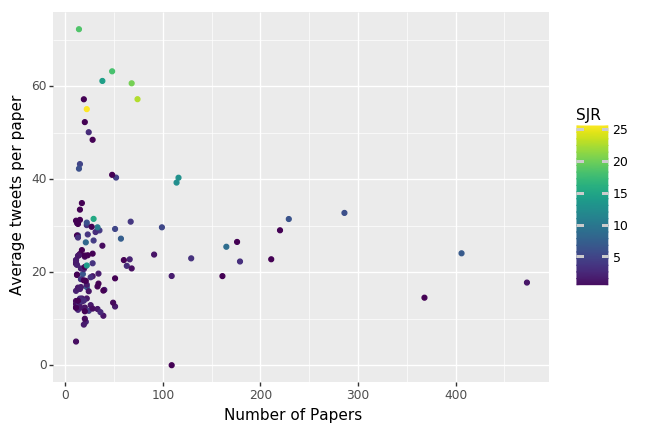

<ggplot: (-9223363288478103594)>

In [299]:
p = ggplot(merged, aes(x='size', y='mean', colour = 'SJR')) + geom_point()
p = p + xlab('Number of Papers') + ylab('Average tweets per paper') + theme_grey()
p

/home/lynnyi/anaconda3/lib/python3.6/site-packages/mizani/bounds.py:300: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/lynnyi/anaconda3/lib/python3.6/site-packages/mizani/bounds.py:300: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/lynnyi/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:493: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/lynnyi/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 33 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


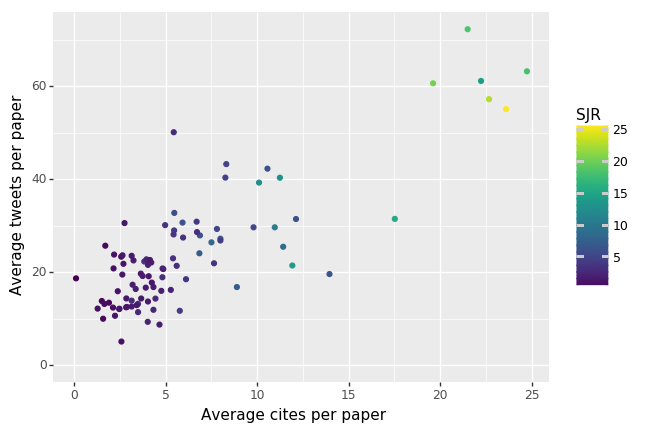

<ggplot: (8748376241598)>

In [314]:
p = ggplot(merged, aes(x='Cites', y='mean', colour = 'SJR')) + geom_point()
p = p + xlab('Average cites per paper') + ylab('Average tweets per paper') + theme_grey()
#p = p + geom_text(aes(label='Title'), size=10)
p

/home/lynnyi/anaconda3/lib/python3.6/site-packages/mizani/bounds.py:300: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/lynnyi/anaconda3/lib/python3.6/site-packages/mizani/bounds.py:300: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/lynnyi/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:493: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/lynnyi/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 33 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/lynnyi/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_text : Removed 33 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


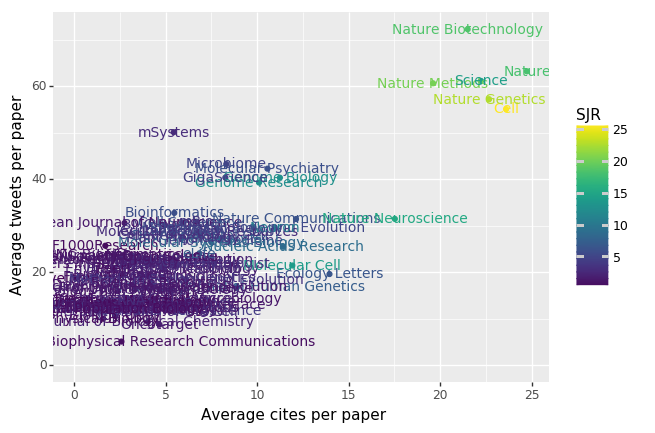

<ggplot: (8748376176567)>

In [315]:
p = ggplot(merged, aes(x='Cites', y='mean', colour = 'SJR')) + geom_point()
p = p + xlab('Average cites per paper') + ylab('Average tweets per paper') + theme_grey()
p = p + geom_text(aes(label='Title'), size=10)
p

In [310]:
merged

,mean,sum,size,var,Title,SJR,Total Cites (3years),Cites / Doc. (2years),S,Cites
848,16.200000,648.0,40,362.369231,ACS Synthetic Biology,2.625,2169.0,5.29,2.625,5.29
144,16.818182,370.0,22,111.012987,American Journal of Human Genetics,7.450,5273.0,8.90,7.450,8.90
1865,14.352941,244.0,17,52.367647,Applied and Environmental Microbiology,1.684,9699.0,3.67,1.684,3.67
2367,23.802198,2166.0,91,431.427106,BMC Bioinformatics,1.479,4300.0,2.19,1.479,2.19
429,30.136364,663.0,22,731.075758,BMC Biology,3.842,1731.0,4.98,3.842,4.98
1928,14.363636,316.0,22,88.718615,BMC Evolutionary Biology,1.656,2707.0,2.86,1.656,2.86
1265,19.192661,2092.0,109,296.082909,BMC Genomics,2.110,14617.0,3.75,2.110,3.75
3803,12.400000,248.0,20,196.568421,BMC Systems Biology,1.109,1040.0,2.13,1.109,2.13
3902,5.090909,56.0,11,11.690909,Biochemical and Biophysical Research Communica...,1.087,14198.0,2.59,1.087,2.59
210,32.765734,9371.0,286,628.881769,Bioinformatics,6.140,18335.0,5.48,6.140,5.48
